## 16장 이미지 인식의 꽃, 컨볼루션 신경망(CNN)

1. 이미지를 인식하는 원리

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import sys
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = '1'

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print(X_train.shape[0]) #학습용 데이터의 개수

60000


In [4]:
print(X_test.shape[0]) #테스트용 데이터의 개수

10000


In [5]:
print(X_train.shape) # 데이터 하나는 28*28의 이미지

(60000, 28, 28)


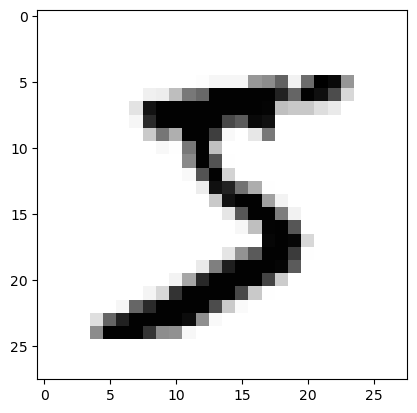

In [6]:
plt.imshow(X_train[0], cmap='Greys') # 넘파이 데이터를 이미지로 형상화
plt.show()

In [7]:
for x in X_train[0]:
    for i in x:
        sys.stdout.write('%-3s' % i) #'%-3s' 세자리 왼쪽정렬
    sys.stdout.write('\n') # 한줄 다 되면 개행

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  3  18 18 18 12613617526 1662552471270  0  0  0  
0  0  0  0  0  0  0  0  30 36 94 15417025325325325325322517225324219564 0  0  0  0  
0  0  0  0  0  0  0  49 23825325325325325325325325325193 82 82 56 39 0  0  0  0  0  
0  0  0  0  0  0  0  18 2192532532532532531981822472410  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  80 15610725325320511 0  43 1540  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  14 1  15425390 0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  1392531902  0  0  0  0  0  0  0 

2. 딥러닝 기본 프레임 만들기

In [8]:
from tensorflow.keras import models, layers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np

In [9]:
X_train = X_train.reshape(X_train.shape[0], 28*28).astype(float) / 255
# X_train.reshape(X_train.shape[0], 28*28) : (60000, 28, 28)=>(60000, 28*28)
X_test = X_test.reshape(X_test.shape[0], 28*28).astype(float) / 255

In [10]:
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [11]:
print(y_train[0])

5


y값 = 0~9. 10차원의 원핫인코딩 필요 keras제공 to_categorical : numpy배열을 원핫인코딩으로  
cf.get_dummies는 pandas 데이터에서 사용

In [12]:
y_train = to_categorical(y_train)

In [13]:
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [14]:
y_test = to_categorical(y_test)

In [15]:
model = models.Sequential()
model.add(layers.Dense(512, input_dim=28*28, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# categorical_crossentropy 다중분류 손실함수

In [17]:
from tensorflow.keras.callbacks import EarlyStopping

In [18]:
early_stop = EarlyStopping(monitor='val_loss', patience=10)

In [19]:
history = model.fit(X_train, y_train, validation_split=0.25, epochs=30, batch_size=200,
                   callbacks=[early_stop])

Epoch 1/30
225/225 [==============================] - 2s 5ms/step - loss: 0.3455 - accuracy: 0.9040 - val_loss: 0.1854 - val_accuracy: 0.9481
Epoch 2/30
225/225 [==============================] - 1s 4ms/step - loss: 0.1466 - accuracy: 0.9589 - val_loss: 0.1462 - val_accuracy: 0.9575
Epoch 3/30
225/225 [==============================] - 1s 4ms/step - loss: 0.0982 - accuracy: 0.9724 - val_loss: 0.1213 - val_accuracy: 0.9640
Epoch 4/30
225/225 [==============================] - 1s 4ms/step - loss: 0.0721 - accuracy: 0.9794 - val_loss: 0.1038 - val_accuracy: 0.9702
Epoch 5/30
225/225 [==============================] - 1s 4ms/step - loss: 0.0538 - accuracy: 0.9846 - val_loss: 0.0946 - val_accuracy: 0.9712
Epoch 6/30
225/225 [==============================] - 1s 4ms/step - loss: 0.0411 - accuracy: 0.9897 - val_loss: 0.0874 - val_accuracy: 0.9739
Epoch 7/30
225/225 [==============================] - 1s 4ms/step - loss: 0.0316 - accuracy: 0.9922 - val_loss: 0.0887 - val_accuracy: 0.9743
Epoch 

In [24]:
print('Test Accuracy: %.4f' % (model.evaluate(X_test, y_test)[1]))

313/313 [==============================] - 1s 1ms/step - loss: 0.0721 - accuracy: 0.9807
Test Accuracy: 0.9807


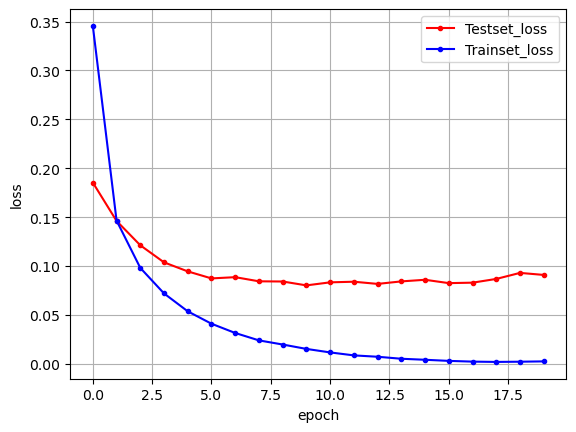

In [25]:
# 검증셋과 학습셋의 오차를 저장합니다. 
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현해 봅니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시해 보겠습니다.
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()